## MATH 6388: Statistical and Machine Learning

### Lecture 4: Dense/convolutional neural networks, activation functions, and gradient descent

### Instructor: Farhad Pourkamali 

#### Department of Mathematical and Statistical Sciences
#### University of Colorado Denver


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farhad-pourkamali/MATH6388/blob/main/Lecture4_NN.ipynb)




### Overview 
<hr style="border:2px solid gray">

* So far, we have seen two linear models for regression and classification problems
    * Linear regression: $p(y|\mathbf{x},\mathbf{w})=\mathcal{N}(\mathbf{w}^T\mathbf{x}, \sigma^2)$, where $\sigma^2$ is a fixed variance for all inputs
    * Logistic regression: $p(y|\mathbf{x},\mathbf{w})=\text{Ber}(y|\sigma(\mathbf{w}^T\mathbf{x}))$, where $\sigma$ is the sigmoid or logistic function

* These models make the strong assumption that the input-output mapping is linear 
    * A better idea: we can equip the feature extractor with its own "trainable" parameters
    
    $$\mathbf{w}^T\phi(\mathbf{x};\boldsymbol{\theta})$$ 
    * Illustrative example in the next slide! 

### Example, part 1: feature extractor
<hr style="border:2px solid gray">

* Consider a classification problem with 3 input features $x_1,x_2,x_3$


<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/nn_example1.png?raw=true\" width=700>

### Example, part 2: classifier
<hr style="border:2px solid gray">

* This is the key idea behind multilayer perceptron (MLP) for "structured" or "tabular" data $\mathbf{x}\in\mathbb{R}^D$


<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/nn_example3.png?raw=true\" width=600>

### Feedforward networks
<hr style="border:2px solid gray">

* The information ﬂows through the function being evaluated from $\mathbf{x}$, through the intermediate computations, and ﬁnally to the output

* For example, we might have  $f^{(1)}, f^{(2)}, f^{(3)}$ connected in a chain to form

$$f(\mathbf{x})=f^{(3)}\Big(f^{(2)}\big(f^{(1)}(\mathbf{x})\big)\Big)$$

* $f^{(1)}$: the first layer,  $f^{(2)}$: the second layer of the network 
    * Because the training data does not show the desired output for  these layers, they are called **hidden layers**


* The overall length of the chain gives the **depth**, and the dimensionality of hidden layers determines the **width** of the model

### Classical example: The XOR problem
<hr style="border:2px solid gray">

* Learn a function that computes the exclusive OR of its two binary outputs (4 data points in $\mathbb{R}^2$) 
    * First activation function: $g(z)=\text{ReLU}(z)=\max\{0,z\}$ and no activation function for the last layer
    
<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/xor_part1.png?raw=true\" width=600>

### Classical example: The XOR problem
<hr style="border:2px solid gray">

* This network correctly predicts all four class labels

<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/xor_part2.png?raw=true\" width=600>

### Why nonlinear activation functions? 
<hr style="border:2px solid gray">

* If we just use a linear activation function, then the whole model reduces to a regular linear model

$$f(\mathbf{x})=\mathbf{W}^{(L)}\ldots\mathbf{W}^{(2)}\mathbf{W}^{(1)}\mathbf{x}=\mathbf{W}\mathbf{x}$$

* Therefore, it is important to use nonlinear activation functions
    * Sigmoid (logistic) function: $\sigma(a)=\frac{1}{1+\exp(-a)}$
    * rectified linear unit or ReLU: $\text{ReLU}(a)=\max\{0, a\}$
    * ...

https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear

### A tour of activation functions
<hr style="border:2px solid gray">

* ReLU (Rectified Linear Unit)
    * ReLU is known for its simplicity and has been widely used in deep learning due to its ability to introduce non-linearity into the network
    
    $$\text{ReLU}(x)=\max\{0, x\}$$
    
* ELU (Exponential Linear Unit)
    * ELU addresses the "dying ReLU" problem by allowing negative values, which helps to keep gradients flowing during training
    * $\alpha$ is a hyperparameter that controls the output of the function for negative values of $x$
    
    $$\text{ELU}(x)=\begin{cases}x & \text{if } x \geq 0 \\
\alpha \cdot \big(\exp(x) - 1\big) & \text{if } x < 0
\end{cases}$$

* Softplus
    * Softplus is a smooth approximation of the ReLU function
    * It has the advantage of being differentiable everywhere, which makes it suitable for gradient-based optimization algorithms
    
    $$\text{Softplus}(x)=\log\big(1+\exp(x)\big)$$


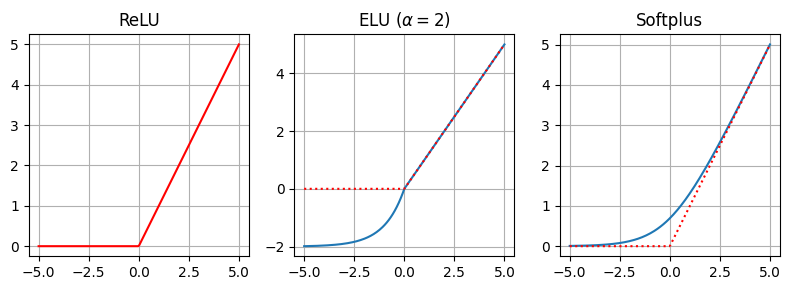

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of x values
x = np.linspace(-5, 5, 200)  # Adjust the range as needed

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Define the ELU function
def elu(x, alpha=2.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

# Define the Softplus function
def softplus(x):
    return np.log(1 + np.exp(x))


# Plot the activation functions
plt.figure(figsize=(8, 3))

plt.subplot(1, 3, 1)
plt.title("ReLU")
plt.plot(x, relu(x), 'r-')
plt.grid()

plt.subplot(1, 3, 2)
plt.title(r"ELU ($\alpha=2$)")
plt.plot(x, elu(x))
plt.plot(x, relu(x), 'r:')
plt.grid()

plt.subplot(1, 3, 3)
plt.title("Softplus")
plt.plot(x, softplus(x))
plt.plot(x, relu(x), 'r:')
plt.grid()

plt.tight_layout()
plt.show()

### Gradient-based learning
<hr style="border:2px solid gray">

* Neural networks are usually trained by using iterative, gradient-based optimizers such as (stochastic) gradient descent

$$\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_{t} - \eta_t \nabla J(\boldsymbol{\theta}_{t})$$

* $\boldsymbol{\theta}_{t}$ is the parameter vector at iteration $t$
* $\eta_t$ is the learning rate, determining the step size
* $g_t=\nabla J(\boldsymbol{\theta}_{t})$ is the gradient of the loss function 

* Momentum
    * Introduces a velocity term $v_t$ that keeps track of the historical gradients and helps the optimization algorithm navigate through flat or noisy regions
    
    $$v_{t+1}=\beta v_{t} + g_t\\ \boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_{t} - \eta_t v_{t+1}$$
    
    * The velocity terms acts like an exponentially weighted moving average of the past gradients
    
    $$v_{t+1}=\beta v_{t} + g_t=\beta \big(\beta v_{t-1} + g_{t-1}\big) + g_t=\beta^2 v_{t-1} + \beta g_{t-1} + g_t$$
    
    $$v_{t+1}=\beta^3 v_{t-2} + \beta^2 g_{t-2} + \beta g_{t-1} + g_t$$
    
    * The "scaling factor" is a geometric series, whose infinite sum is given by ($\beta<1$)
    
    $$1+\beta+\beta^2+\ldots = \sum_{i=0}^\infty \beta^i = \frac{1}{1-\beta}$$
    
* Nesterov Momentum 
    * Tweaks this approach by introducing a "lookahead step" before calculating the gradient
    * Estimates where the parameter vector will be in the next iteration and then calculates the gradient at that estimated position
    * This helps reduce oscillations and accelerates convergence during training, making it a popular choice in deep learning
    
    $$v_{t+1}=\beta v_t + \eta_t \nabla J(\boldsymbol{\theta}_t + \beta v_t)\\ \boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_t - v_{t+1}$$
    

### Backprop

* The back-propagation algorithm allows the information from the cost to ﬂow *backward* through the network in order to compute the gradient
    * Utilize the chain rule of calculus to compute the derivatives of functions formed by composing other functions
    * In the next slide, we look at a simplified model

### Backprop and chain rule
<hr style="border:2px solid gray">

* Consider a 3-layer network with one unit in each layer and a scalar input 

<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/backprop1.png?raw=true\" width=700>

In [2]:
import tensorflow as tf

# Define the function f(u, v)
def f(u, v):
    return 3 * u + 5 * v

# Define values for x and y
x = tf.constant(2.0)
y = tf.constant(3.0)

# Use tf.GradientTape to compute gradients
with tf.GradientTape(persistent=True) as tape:
    # Watch the variables we want to compute gradients with respect to
    tape.watch(x)
    tape.watch(y)
    
    # Define u and v as functions of x and y
    u = 2 * x
    v = x + y

    # Define f as a function of u and v
    result = f(u, v)

# Compute the gradients
df_dx = tape.gradient(result, x)
df_dy = tape.gradient(result, y)


# Print the gradients
print("df/dx:", df_dx.numpy())
print("df/dy:", df_dy.numpy())


Metal device set to: Apple M2 Max
df/dx: 11.0
df/dy: 5.0


### Implementing MLPs with Keras

<hr style="border:2px solid gray">

* Keras is a high-level Deep Learning API to build, train, and evaluate all sorts of neural networks
    * Keras runs on top of TensorFlow 2
    * The best way to learn Keras: https://keras.io/
        * Layers 
        * Models: groups layers into an object with training/inference features 
        * Optimizers
        * Losses
        * Metrics

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.12.0


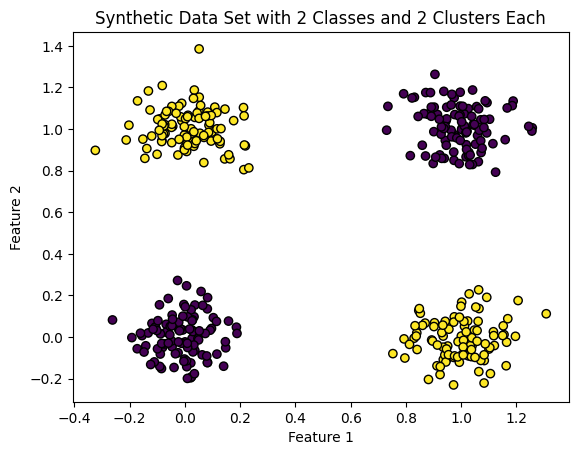

In [4]:
# Example 0 
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic data set
X, y = make_blobs(n_samples=400, centers=[[0, 0], [0, 1], [1, 0], [1, 1]], cluster_std=0.1, random_state=42)

y[y == 0] = 0
y[y == 1] = 1
y[y == 2] = 1
y[y == 3] = 0


# Plot the synthetic data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Synthetic Data Set with 2 Classes and 2 Clusters Each')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()

# Add the input layer and the hidden layer
model.add(Dense(units=2, activation='elu', input_dim=2))  # Assuming 2 input features

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
              loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.layers[0].get_weights()

[array([[ 0.54865944, -0.9711655 ],
        [-0.40526658, -0.31417513]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [7]:
model.layers[1].get_weights()

[array([[0.5329431],
        [1.0430354]], dtype=float32),
 array([0.], dtype=float32)]

In [8]:
model.layers[2].get_weights()

IndexError: list index out of range

In [9]:
model.layers

In [10]:
history = model.fit(X, y, epochs=50, batch_size=16)

Epoch 1/50
 1/25 [>.............................] - ETA: 4s - loss: 0.7586 - accuracy: 0.3750

2023-10-02 15:07:08.001045: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


25/25 [==============================] - 0s 5ms/step - loss: 0.7169 - accuracy: 0.2875
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.3450
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6809 - accuracy: 0.5625
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6673 - accuracy: 0.6675
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6533 - accuracy: 0.7075
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6358 - accuracy: 0.8050
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6172 - accuracy: 0.9250
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5894 - accuracy: 0.8925
Epoch 9/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5594 - accuracy: 0.9875
Epoch 10/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5188 - accuracy: 0.9925
Epoch 11/50
25/25 [===========

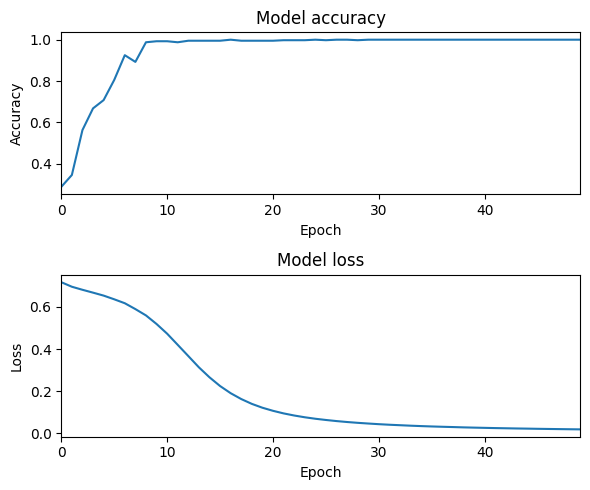

In [11]:
plt.rcParams["figure.figsize"] = (6,5)

fig, axs = plt.subplots(2)
axs[0].plot(history.history['accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlim([0, 49])

axs[1].plot(history.history['loss'])
axs[1].set_title('Model loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_xlim([0, 49])

plt.tight_layout()

plt.show()

In [12]:
model.layers[0].get_weights()

[array([[ 3.1427412, -3.25227  ],
        [-3.2068102,  3.1473947]], dtype=float32),
 array([-0.84628737, -0.84602726], dtype=float32)]

In [13]:
model.layers[1].get_weights()

[array([[3.9282331],
        [4.000449 ]], dtype=float32),
 array([0.24108168], dtype=float32)]

1/1 [==============================] - 0s 49ms/step


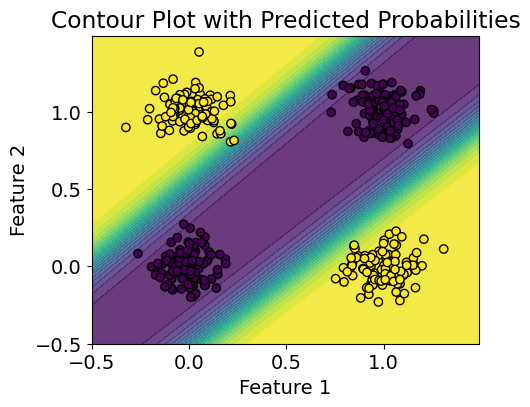

In [14]:
# visualize the classifier 

plt.rcParams.update({'font.size': 14, "figure.figsize": (5,4)})
# Create a mesh grid for the entire feature space
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
step = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), 
                     np.arange(y_min, y_max, step))

# Flatten the meshgrid and make predictions
mesh_input = np.c_[xx.ravel(), yy.ravel()]
predictions = model.predict(mesh_input, batch_size=len(mesh_input))

# Reshape predictions to the shape of the meshgrid
predictions = predictions.reshape(xx.shape)

# Create a contour plot
plt.contourf(xx, yy, predictions, cmap='viridis', levels=20, alpha=0.8)

# Scatter plot of the synthetic data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')

plt.title('Contour Plot with Predicted Probabilities')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### First example

<hr style="border:2px solid gray">

* Building an Image Classifier using the Sequential API
    * Work with the Fashion MNIST data set
    * Steps: 
        * Preparing the data
        * Creating the model (number of hidden layers, ...)
        * Compiling the model (loss function, optimizer, ...)
        * Training the model 
        * Using the model to make predictions 
        
<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/fmnist.png?raw=true\" width=400>

In [15]:
# The dataset is already divided into train/test sets 

fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape, X_test.shape, X_train_full.dtype)

(60000, 28, 28) (10000, 28, 28) uint8


In [16]:
# Split the train set into a validation set and a (smaller) train set

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

print(X_test.dtype)

float64


In [17]:
# Type of labels

y_train[:10]

array([4, 0, 7, 9, 9, 9, 4, 4, 3, 4], dtype=uint8)

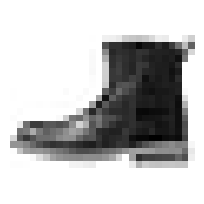

In [18]:
plt.figure(figsize=(7.2, 2.4))

plt.imshow(X_train[3], cmap='binary')
plt.axis('off')
plt.show()

In [19]:
# Creating the model using the Sequential API

model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu")) # 300 neurons, activation function: ReLU 
model.add(keras.layers.Dense(100, activation="relu")) # 100 neurons
model.add(keras.layers.Dense(10, activation="softmax")) # 10 classes so "softmax"


In [20]:
# Another way to create the model with a "list" of layers

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 300)               235500    
                                                                 
 dense_6 (Dense)             (None, 100)               30100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
# How can we calculate the number of parameters? 

300*785 + 100 * 301 + 10 * 101

266610

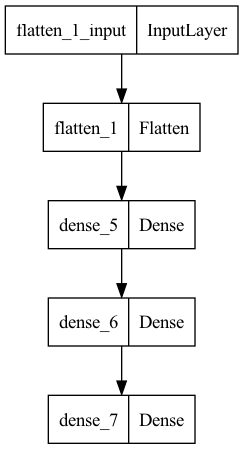

In [23]:
# Visualize the model 

from keras.utils import plot_model

plot_model(model, to_file='model.png')

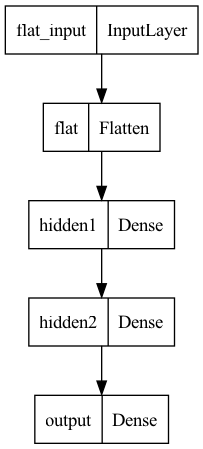

In [24]:
# Name layers 
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28], name='flat'),
    keras.layers.Dense(300, activation="relu", name='hidden1'),
    keras.layers.Dense(100, activation="relu", name='hidden2'),
    keras.layers.Dense(10, activation="softmax", name='output')
])

plot_model(model, to_file='model.png')

In [25]:
model.layers

In [26]:
# All the parameters of a layer can be accessed using its 

layer = model.layers[1]

print(layer.name)

hidden1


In [27]:
weights, biases = layer.get_weights()

print(weights.shape, biases.shape)

(784, 300) (300,)


In [28]:
# Compiling the model 

model.compile(loss="sparse_categorical_crossentropy", # "sparse" because labels are 0,1,2,...
              optimizer="sgd",
              metrics=["accuracy"]) 

What is `sgd`? https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/legacy/SGD

In [29]:
# Training the model 

history = model.fit(X_train, y_train, batch_size=64, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
860/860 [==============================] - 4s 4ms/step - loss: 0.8657 - accuracy: 0.7246 - val_loss: 0.5994 - val_accuracy: 0.8080
Epoch 2/5
860/860 [==============================] - 4s 4ms/step - loss: 0.5519 - accuracy: 0.8152 - val_loss: 0.5338 - val_accuracy: 0.8090
Epoch 3/5
860/860 [==============================] - 4s 5ms/step - loss: 0.4915 - accuracy: 0.8325 - val_loss: 0.4571 - val_accuracy: 0.8486
Epoch 4/5
860/860 [==============================] - 4s 4ms/step - loss: 0.4617 - accuracy: 0.8403 - val_loss: 0.4503 - val_accuracy: 0.8484
Epoch 5/5
860/860 [==============================] - 4s 4ms/step - loss: 0.4400 - accuracy: 0.8465 - val_loss: 0.4568 - val_accuracy: 0.8362


In [30]:
# Why do we have 860 updates in each epoch? 

np.ceil(55000/64)

860.0

In [31]:
# What is included in history? 

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

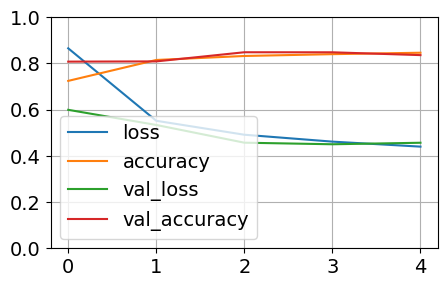

In [32]:
pd.DataFrame(history.history).plot(figsize=(5, 3))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [33]:
# evaluate the model 

model.evaluate(X_test, y_test, batch_size=10000) # one batch 


1/1 [==============================] - 0s 59ms/step - loss: 0.5035 - accuracy: 0.8146


[0.5035116672515869, 0.8146000504493713]

In [34]:
# making predictions 

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 46ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.2 , 0.  , 0.72],
       [0.  , 0.  , 0.76, 0.  , 0.  , 0.  , 0.23, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [35]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])

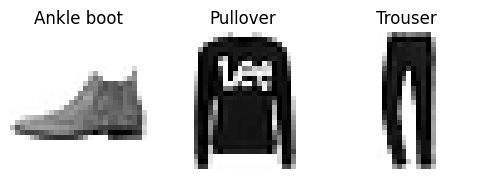

In [36]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(6, 3))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Second example
<hr style="border:2px solid gray">

* In this illustration, we delve into the influence of activation functions on the precision of neural networks, exploring the effects of three distinct activation functions
    * Rectified Linear Unit (ReLU)
    * Exponential Linear Unit (ELU)
    * Softplus

* The Functional API in Keras allows you to create custom neural network architectures with more flexibility than the Sequential API
    * Define Input Layer: `input_layer = Input(shape=(input_shape,))`
    * Create Layers and Connect Them: `hidden_layer = Dense(128, activation='relu')(input_layer)` and `output_layer = Dense(output_shape, activation='softmax')(hidden_layer)`
    * Model Declaration: `model = keras.Model(inputs=input_layer, outputs=output_layer)`

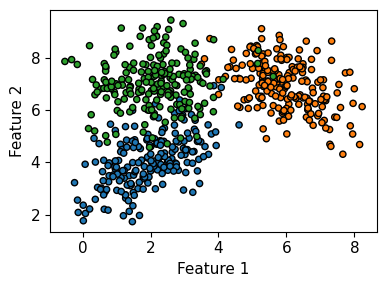

In [37]:
# Set random seed for reproducibility
np.random.seed(5)

# Generate synthetic data for three-class classification
mean_class_1 = [2, 4]
cov_class_1 = [[1, 0.5], [0.5, 1]]
data_class_1 = np.random.multivariate_normal(mean_class_1, cov_class_1, 200)

mean_class_2 = [6, 7]
cov_class_2 = [[1, -0.5], [-0.5, 1]]
data_class_2 = np.random.multivariate_normal(mean_class_2, cov_class_2, 200)

mean_class_3 = [2, 7]
cov_class_3 = [[1, 0], [0, 1]]
data_class_3 = np.random.multivariate_normal(mean_class_3, cov_class_3, 200)

# Combine the three classes into a single dataset
X = np.vstack((data_class_1, data_class_2, data_class_3))
y = np.hstack((np.zeros(200), np.ones(200), 2 * np.ones(200)))  

# Plot the synthetic data
plt.rcParams.update({'font.size': 11, "figure.figsize": (4,3)})
colors = {0: "#1f77b4", 1: "#ff7f0e", 2:  "#2ca02c", 3: "#d62728"}
y_col = list(map(colors.get, y))

plt.scatter(X[:, 0], X[:, 1], c=y_col, marker='o', s=20, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

In [38]:
from sklearn.model_selection import train_test_split 

y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)

(420, 2) (180, 2)


In [39]:
from sklearn.metrics import accuracy_score 

activation_functions = ["softplus", "elu", "relu"]

def create_model(activation):
    """
    MLP with one hidden layer and different choices of
    activation functions
    """
    
    inputs_ = keras.Input(shape=(2,), name='input')
    
    hidden = keras.layers.Dense(2, activation=activation, name='hidden')(inputs_)
    
    outputs_ = keras.layers.Dense(3, activation="softmax", name='output')(hidden)
    
    model = keras.Model(inputs=inputs_, outputs=outputs_)
    
    return model

keras.utils.set_random_seed(seed=4)

for item in activation_functions:
    
    keras.backend.clear_session()
    
    model = create_model(item)
    
    # Compile 
    model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd",
              metrics=["accuracy"]) 
    
    # Train 
    model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=0)
    
    # Evaluate 
    print(str(item) + ": " + str(accuracy_score(y_test, model.predict(X_test).argmax(axis=1))))
    

6/6 [==============================] - 0s 3ms/step
softplus: 0.45
6/6 [==============================] - 0s 3ms/step
elu: 0.7111111111111111
6/6 [==============================] - 0s 2ms/step
relu: 0.29444444444444445


### Third example
<hr style="border:2px solid gray">

* Neural network with different activation functions

* In this example, we will create a model with three branches, each using a different activation function, and then concatenate the outputs of these branches before the final output layer

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Concatenate

# Define input shape
input_dim = 2
input_shape = (input_dim,)

keras.utils.set_random_seed(seed=4)

# Define the input layer
input_layer = Input(shape=input_shape)

# Create two branches with different activation functions
branch_1 = Dense(2, activation='elu')(input_layer)
branch_2 = Dense(2, activation='softplus')(input_layer)
branch_3 = Dense(2, activation='relu')(input_layer)


# Concatenate the outputs of the two branches
concatenated = Concatenate()([branch_1, branch_2, branch_3])

# Output layer
output_dim = 3
output_layer = Dense(output_dim, activation='softmax')(concatenated)

# Create the model
model = keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=0)

 
# Evaluate 
print("combined" + ": " + str(accuracy_score(y_test, model.predict(X_test).argmax(axis=1))))
    


6/6 [==============================] - 0s 4ms/step
combined: 0.8888888888888888


### Fourth example: trainable activation functions
<hr style="border:2px solid gray">


* Fixed activation functions are chosen before training 
    * Remain unchanged throughout the training process

* These fixed functions might not be optimal for all layers or tasks
    * Leading to suboptimal performance

* Trainable activation functions are neural network components that adapt and learn their parameters during training

    * Instead of using a fixed mathematical function like ReLU, trainable activation functions learn their function's shape from data
    * Trainable activation functions are often implemented as additional neural network layers 

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from keras.layers import Dense

tf.keras.utils.set_random_seed(5)

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a custom activation function with a learnable parameter
class CustomActivation(tf.keras.layers.Layer):
    def __init__(self, units=1, **kwargs):
        super(CustomActivation, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.alpha = self.add_weight(
            shape=(self.units,),
            initializer='ones',
            trainable=True,
            name='alpha',
        )
        super(CustomActivation, self).build(input_shape)

    def call(self, x):
        return self.alpha * tf.keras.activations.relu(x) # relu

# Create a Sequential model
model_with_custom_activation = keras.Sequential()

# Add a hidden layer with the custom activation function
model_with_custom_activation.add(Dense(32, activation=CustomActivation(units=1)))

# Add an output layer (3 classes in Iris dataset)
model_with_custom_activation.add(Dense(3, activation='softmax'))

# Compile the model with SGD optimizer
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model_with_custom_activation.compile(loss='sparse_categorical_crossentropy', 
                                     optimizer=optimizer, metrics=['accuracy'])

# Train the model
model_with_custom_activation.fit(X_train, y_train, epochs=100, batch_size=16, 
                                 validation_split=0.1, verbose=0)

# Evaluate the model on the test set
test_loss, test_accuracy = model_with_custom_activation.evaluate(X_test, y_test)
print(f'Test accuracy with Custom Activation: {test_accuracy * 100:.2f}%')

1/1 [==============================] - 0s 28ms/step - loss: 0.1719 - accuracy: 1.0000
Test accuracy with Custom Activation: 100.00%


In [42]:
model_with_custom_activation.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                161       
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 260
Trainable params: 260
Non-trainable params: 0
_________________________________________________________________


In [43]:
model_with_custom_activation.weights[2]

<tf.Variable 'dense_4/custom_activation/alpha:0' shape=(1,) dtype=float32, numpy=array([1.7303293], dtype=float32)>

In [44]:
tf.keras.utils.set_random_seed(5)


# Create a Sequential model without the custom activation function
model_without_custom_activation = keras.Sequential()


# Add a hidden layer
model_without_custom_activation.add(Dense(32, activation='relu'))

# Add an output layer (3 classes in Iris dataset)
model_without_custom_activation.add(Dense(3, activation='softmax'))

# Compile the model with SGD optimizer
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model_without_custom_activation.compile(loss='sparse_categorical_crossentropy', 
                                        optimizer=optimizer, metrics=['accuracy'])

# Train the model
model_without_custom_activation.fit(X_train, y_train, epochs=100, batch_size=16, 
                                    validation_split=0.1, verbose=0)

# Evaluate the model on the test set
test_loss, test_accuracy = model_without_custom_activation.evaluate(X_test, y_test)
print(f'Test accuracy without Custom Activation: {test_accuracy * 100:.2f}%')


1/1 [==============================] - 0s 26ms/step - loss: 0.2499 - accuracy: 0.9333
Test accuracy without Custom Activation: 93.33%


In [45]:
model_without_custom_activation.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                160       
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________


### Convolutional neural networks (CNNs)
<hr style="border:2px solid gray">

* CNN captures the spatial features from an image, i.e., the arrangement of pixels and the relationship between them

* They have three main types of layers, which are:
    * Convolutional layer
    * Pooling layer
    * Fully-connected (FC) or Dense layer 
    
* Advantages over MLPs
    * Fewer parameters to learn
    * All patches of an image will be treated in the same manner (translation invariance)
    * Only a small neighborhood of pixels will be used to compute hidden representations (locality)
   

* A convolution layer is made up of a large number of convolution filters 

* A convolution filter relies on a simple operation, called a convolution

    * repeatedly multiplying matrix elements and then adding the results
    * consider a very simple example of a 4x3 image
$$
\text{image}=\begin{bmatrix}
    a_{11} & a_{12} & a_{13} \\
    a_{21} & a_{22} & a_{23} \\
    a_{31} & a_{32} & a_{33} \\
    a_{41} & a_{42} & a_{43} \\
\end{bmatrix}
$$
* consider a 2x2 filter of the form
$$
\text{filter}=\begin{bmatrix}
    f_{11} & f_{12} \\
    f_{21} & f_{22} \\
\end{bmatrix}
$$

* When we convolve the image with the filter, we get the result
$$
\begin{bmatrix}
  a_{11}f_{11}+a_{12}f_{12}+a_{21}f_{21}+a_{22}f_{22}   &  a_{12}f_{11}+a_{13}f_{12}+a_{22}f_{21}+a_{23}f_{22}\\
   a_{21}f_{11}+a_{22}f_{12}+a_{31}f_{21}+a_{32}f_{22}  &  a_{22}f_{11}+a_{23}f_{12}+a_{32}f_{21}+a_{33}f_{22}\\
    a_{31}f_{11}+a_{32}f_{12}+a_{41}f_{21}+a_{42}f_{22} &  a_{32}f_{11}+a_{33}f_{12}+a_{42}f_{21}+a_{43}f_{22}\\
\end{bmatrix}
$$

* If the image size is $n_h\times n_w$ and the size of the convolution filter is $k_h\times k_w$, we get 

$$\big(n_h - k_h + 1 \big)\times \big(n_w - k_w + 1 \big)$$

* Thus, the output size is slightly smaller than the input size

* "Padding" refers to the technique of adding extra rows and columns of zeros around the input data before applying a convolution operation
    * control the spatial dimensions of the output feature maps
    * preserve information at the edges of the input
    
* If we add a total of $p_h$ rows of padding and $p_w$ columns of padding, the output shape will be

$$\big(n_h - k_h + p_h + 1 \big)\times \big(n_w - k_w + p_w + 1 \big)$$

* Hence, we can give the input and output the same height and width by choosing 

$$p_h = k_h - 1, \; p_w = k_w - 1$$

* This is why CNNs commonly use convolution filters with odd height and width values
    * padding with the same number of rows on top and bottom, and the same number of columns on left and right
    
* "Stride" controls how much the filter shifts (horizontally and vertically) between successive applications to generate the output feature map
    * That is, the number of rows and columns traversed per slide 
    * A stride of 1 means that the filter moves one pixel at a time (no skipping)
    * A stride greater than 1 causes the filter to skip pixels
    
$$\lfloor\big(n_h-k_h+p_h+s_h\big)/s_h\rfloor \times \lfloor\big(n_w-k_w+p_w+s_w\big)/s_w\rfloor$$

### Multiple input channels
<hr style="border:2px solid gray">

* When the input data or image contains multiple channels, we need to construct a convolution filter with the same number of channels 

    * For example, consider $C$ channels for the previous case study, $i=1,2,\ldots,C$
 
    $$\text{channel $i$ of image} =\begin{bmatrix}
    a_{11}^{(i)} & a_{12}^{(i)} & a_{13}^{(i)} \\
    a_{21}^{(i)} & a_{22}^{(i)} & a_{23}^{(i)} \\
    a_{31}^{(i)} & a_{32}^{(i)} & a_{33}^{(i)} \\
    a_{41}^{(i)} & a_{42}^{(i)} & a_{43}^{(i)} \\
\end{bmatrix}$$

$$\text{channel $i$ of filter}=\begin{bmatrix}
    f_{11}^{(i)} & f_{12}^{(i)} \\
    f_{21}^{(i)} & f_{22}^{(i)} \\
\end{bmatrix}$$

* Final result: two-dimensional tensor

$$\begin{bmatrix}
  \sum_{i=1}^C [a_{11}^{(i)}f_{11}^{(i)}+a_{12}^{(i)}f_{12}^{(i)}+a_{21}^{(i)}f_{21}^{(i)}+a_{22}^{(i)}f_{22}^{(i)}]   &  \sum_{i=1}^C [a_{12}^{(i)}f_{11}^{(i)}+a_{13}^{(i)}f_{12}^{(i)}+a_{22}^{(i)}f_{21}^{(i)}+a_{23}^{(i)}f_{22}^{(i)}]\\
\sum_{i=1}^C   [a_{21}^{(i)}f_{11}^{(i)}+a_{22}^{(i)}f_{12}^{(i)}+a_{31}^{(i)}f_{21}^{(i)}+a_{32}^{(i)}f_{22}^{(i)}]  & \sum_{i=1}^C [a_{22}^{(i)}f_{11}^{(i)}+a_{23}^{(i)}f_{12}^{(i)}+a_{32}^{(i)}f_{21}^{(i)}+a_{33}^{(i)}f_{22}^{(i)}]\\
    \sum_{i=1}^C [a_{31}^{(i)}f_{11}^{(i)}+a_{32}^{(i)}f_{12}^{(i)}+a_{41}^{(i)}f_{21}^{(i)}+a_{42}^{(i)}f_{22}^{(i)}] &  \sum_{i=1}^C [a_{32}^{(i)}f_{11}^{(i)}+a_{33}^{(i)}f_{12}^{(i)}+a_{42}^{(i)}f_{21}^{(i)}+a_{43}^{(i)}f_{22}^{(i)}]\\
\end{bmatrix}$$

### Multiple output channels
<hr style="border:2px solid gray">

* In a convolution layer, you typically have multiple filters. Each filter is a small, learnable tensor that slides or convolves over the input data

* The number of filters you specify in a layer determines the number of output channels

* Denote by $C_i$ and $C_o$ the number of input and output channels

    * Let $k_h$ and $k_w$ be the height and width of the filter
    * To get an output with multiple channels, we can create a filter tensor of shape $k_h\times k_w \times C_i$ for every output channel 
    * Hence, we concatenate them on the output channel dimension, so that the shape of the convolution filter is $k_h\times k_w \times C_i \times C_o$


### Maximum pooling
<hr style="border:2px solid gray">

* The primary purpose of max pooling is to downsample the spatial dimensions of feature maps

* This reduction in spatial resolution helps control the computational complexity of the network 

* Max pooling introduces a degree of position invariance, meaning that the model can recognize features regardless of their precise location in the input

* In each pooling window (typically 2x2 or 3x3), max pooling selects the maximum value

    * It operates on each channel (feature map) of the input independently


In [46]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 output classes for Fashion MNIST
])


In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

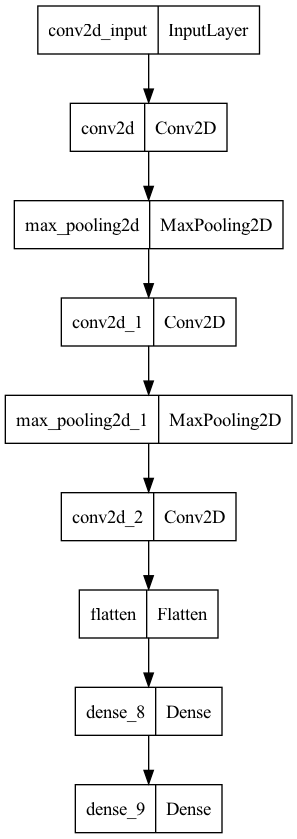

In [48]:
from keras.utils import plot_model

plot_model(model, to_file='model.png')

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9138 - accuracy: 0.6685 - val_loss: 0.6157 - val_accuracy: 0.7669
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5284 - accuracy: 0.8020 - val_loss: 0.4975 - val_accuracy: 0.8191
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4527 - accuracy: 0.8355 - val_loss: 0.4464 - val_accuracy: 0.8363
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4074 - accuracy: 0.8510 - val_loss: 0.4149 - val_accuracy: 0.8504
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3766 - accuracy: 0.8632 - val_loss: 0.3863 - val_accuracy: 0.8626
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3537 - accuracy: 0.8712 - val_loss: 0.3766 - val_accuracy: 0.8668
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3351 - accuracy: 0.8779 - val_loss: 0.3639 - val_accu

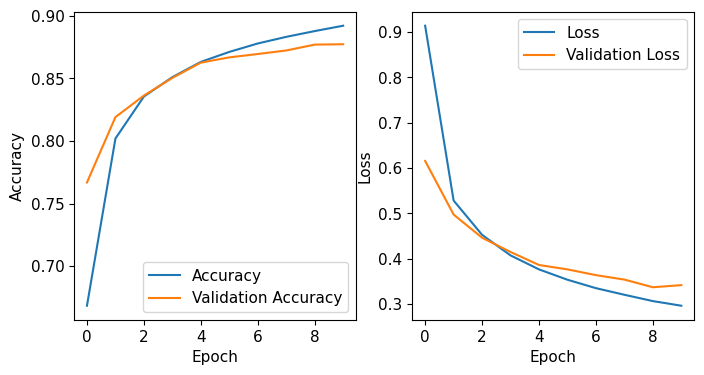

In [49]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.01,
                                                       momentum=0.2,nesterov=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images[:,:,:,np.newaxis], train_labels, epochs=10,
                    validation_data=(test_images[:,:,:,np.newaxis], test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images[:,:,:,np.newaxis], test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

# Plot the training history
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 1D Convolutional Neural Network 
* A 1D Convolutional Neural Network (CNN) is a type of neural network architecture designed to analyze and extract patterns from one-dimensional sequences of data, such as time series or sequential data

    * 1D CNNs apply convolutional filters (kernels) to the input sequence to capture local patterns and features
    * These filters slide along the sequence, similar to how 2D CNNs slide filters over images


* Next, we will investigate 1D CNNs

    * We generate synthetic sensor data to simulate sensor readings or measurements

    * The synthetic sensor data consists of two classes (or patterns), referred to as "class_0_data" and "class_1_data"
    
    * Each class contains data samples with a length of 100 data points (or time steps)

    * The data for "class_0" is generated using random values from a standard normal distribution (mean=0, standard deviation=1)

    * The data for "class_1" is generated similarly but with a different mean and standard deviation to create a distinct pattern

In [50]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Generate synthetic sensor data
np.random.seed(0)
num_samples = 1000
signal_length = 100
num_classes = 2

# Create a synthetic dataset with two classes (patterns)
class_0_data = np.random.randn(num_samples // 2, signal_length)
class_1_data = 2 * np.random.randn(num_samples // 2, signal_length) 

# Create labels for the dataset
class_0_labels = np.zeros((num_samples // 2,), dtype=np.int32)
class_1_labels = np.ones((num_samples // 2,), dtype=np.int32)
labels = np.concatenate([class_0_labels, class_1_labels])

# Combine the data from both classes
data = np.concatenate([class_0_data, class_1_data])

# Shuffle the data and labels
shuffle_indices = np.arange(num_samples)
np.random.shuffle(shuffle_indices)
data = data[shuffle_indices]
labels = labels[shuffle_indices]

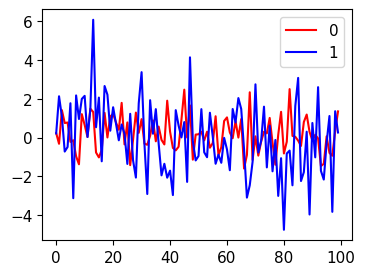

In [51]:
plt.plot(data[6], 'r-' , label = labels[6])  
plt.plot(data[1], 'b', label= labels[1]) 
plt.legend()
plt.show()

Epoch 1/10
18/18 [==============================] - 0s 16ms/step - loss: 0.6868 - accuracy: 0.5321 - val_loss: 0.6645 - val_accuracy: 0.4857
Epoch 2/10
18/18 [==============================] - 0s 6ms/step - loss: 0.5994 - accuracy: 0.5661 - val_loss: 0.6869 - val_accuracy: 0.5643
Epoch 3/10
18/18 [==============================] - 0s 6ms/step - loss: 0.5432 - accuracy: 0.7071 - val_loss: 0.6252 - val_accuracy: 0.5429
Epoch 4/10
18/18 [==============================] - 0s 6ms/step - loss: 0.4579 - accuracy: 0.7786 - val_loss: 0.5749 - val_accuracy: 0.7071
Epoch 5/10
18/18 [==============================] - 0s 6ms/step - loss: 0.3403 - accuracy: 0.9054 - val_loss: 0.3839 - val_accuracy: 0.8643
Epoch 6/10
18/18 [==============================] - 0s 6ms/step - loss: 0.2034 - accuracy: 0.9821 - val_loss: 0.2641 - val_accuracy: 0.9143
Epoch 7/10
18/18 [==============================] - 0s 8ms/step - loss: 0.0992 - accuracy: 1.0000 - val_loss: 0.1414 - val_accuracy: 0.9857
Epoch 8/10
18/18 [=

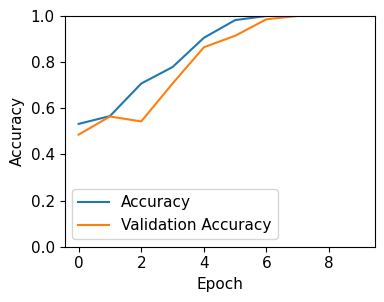

In [52]:
# Split the dataset into training and testing sets
train_split = 0.7
split_index = int(train_split * num_samples)
train_data, test_data = data[:split_index], data[split_index:]
train_labels, test_labels = labels[:split_index], labels[split_index:]

# Create a 1D CNN model
model = models.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(signal_length, 1)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Reshape data to fit the model's input shape
train_data = train_data[:, :, np.newaxis]
test_data = test_data[:, :, np.newaxis]

# Train the model
history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.001])
plt.legend()
plt.show()
